In [1]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Load dataset
df = pd.read_csv(r'C:\Users\Lenovo\HeartHealth\backend\data\Cleaned_dataset.csv')
print(df.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  zscore_chol  
0              N      0.0       Up             0     0.825070  
1              N      1.0     Flat             1    -0.171961  
2              N      0.0       Up             0     0.770188  
3              Y      1.5     Flat             1     0.139040  
4              N      0.0       Up             0    -0.034755  


In [3]:
# Preprocess data
x = df.drop(['HeartDisease'], axis=1)  # x represents feature set
y = df['HeartDisease']  # y represents target variable i.e., heart disease
print(x)
print("\n\n")
print(y)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
730   45   M            TA        110          264          0     Normal   
731   68   M           ASY        144          193          1     Normal   
732   57   M           ASY        130          131          0     Normal   
733   57   F           ATA        130          236          0        LVH   
734   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  zscore_chol  
0      172              N   

In [4]:
# The categorical and numerical features based on the column names
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Preprocessing pipelines for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),  # No transformation needed for numerical features
        ('cat', OneHotEncoder(sparse_output=False, drop='first'), categorical_features),
    ],
    remainder='passthrough'  # Encode categorical features
)

In [5]:
model = DecisionTreeClassifier(random_state=42)

# Pipeline that combines preprocessing and classification
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

In [6]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit the pipeline
pipeline.fit(x_train, y_train)

# Save the model using pickle
with open('heart_disease_pipeline_model.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

# test_size=0.2 indicates 20% of the data is used for testing and remaining 80% is used for training
# random_state=42 ensures the split is reproducible
print(f"Training feature set shape: {x_train.shape}")

Training feature set shape: (588, 12)


In [7]:
print(f"Testing feature set shape: {x_test.shape}")

Testing feature set shape: (147, 12)


In [8]:
print(f"Training target set shape: {y_train.shape}")

Training target set shape: (588,)


In [9]:
print(f"Testing target set shape: {y_test.shape}")

Testing target set shape: (147,)


In [10]:
print(x_train.isnull().sum())
print(y_train.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
zscore_chol       0
dtype: int64
0


In [11]:
print(x_train.dtypes)
print(y_train.dtypes)

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
zscore_chol       float64
dtype: object
int64


In [12]:
from sklearn.metrics import accuracy_score

# Predict the test set
y_pred = pipeline.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.82


In [13]:
pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [14]:
# Model evaluation
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predicted probabilities for the positive class
y_proba = pipeline.predict_proba(x_test)[:, 1]

# Computing ROC (Receiver Operating Characteristic) curve and AUC (Area Under the Curve)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

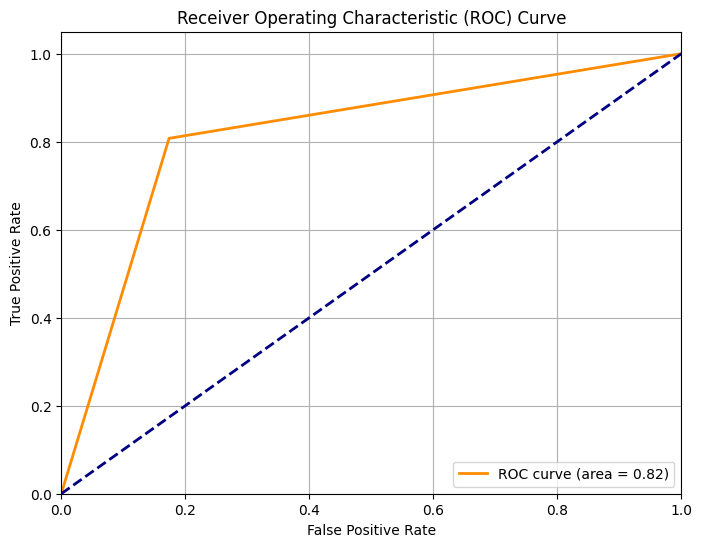

In [15]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

ROC Curve: AUC of 0.83 shows strong performance in distinguishing between classes, with a good balance between true positive rate                 and false positive rate.

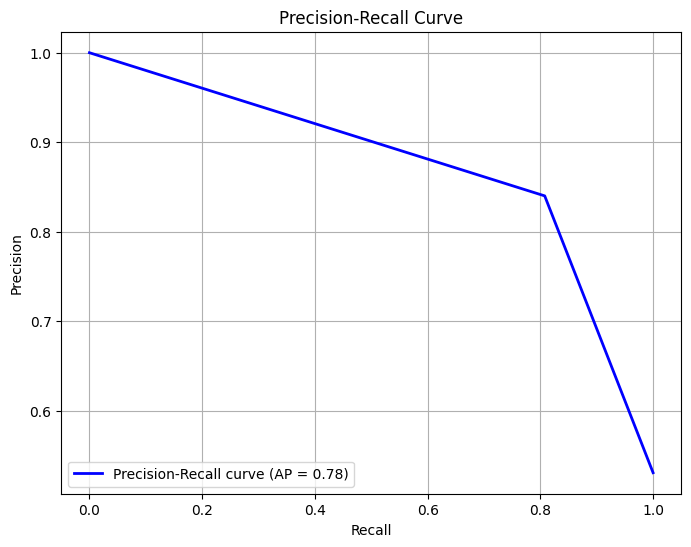

In [16]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_proba)
average_precision = average_precision_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()


Precision-Recall Curve: AUC of 0.82 demonstrates good performance in terms of precision and recall, which is especially useful                   when evaluating the model’s effectiveness with the positive class.

[[57 12]
 [15 63]]


<Figure size 800x600 with 0 Axes>

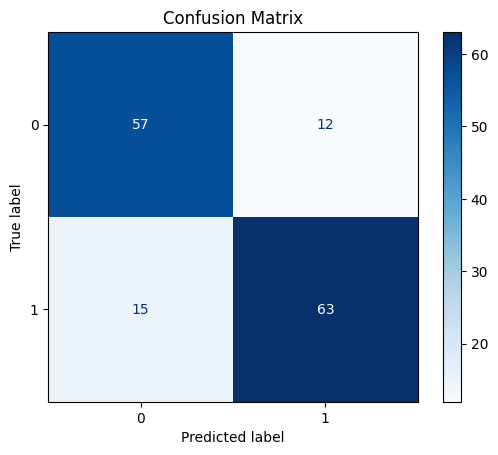

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = pipeline.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

True Negatives (TN): 62 (Correctly predicted non-disease cases)
False Positives (FP): 15 (Incorrectly predicted disease cases)
False Negatives (FN): 16 (Incorrectly predicted non-disease cases)
True Positives (TP): 91 (Correctly predicted disease cases)

In [18]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        69
           1       0.84      0.81      0.82        78

    accuracy                           0.82       147
   macro avg       0.82      0.82      0.82       147
weighted avg       0.82      0.82      0.82       147



Precision:
For Class 0 (Non-Disease): 0.79
For Class 1 (Disease): 0.86
Recall:
For Class 0 (Non-Disease): 0.81
For Class 1 (Disease): 0.85
F1-Score:
For Class 0 (Non-Disease): 0.80
For Class 1 (Disease): 0.85
Overall Accuracy: 0.83

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
